Intervalo de linhas do train.csv


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            

<ipython-input-2-b8df1662f5bc>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(mediana_age, inplace=True)
<ipython-input-2-b8df1662f5bc>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

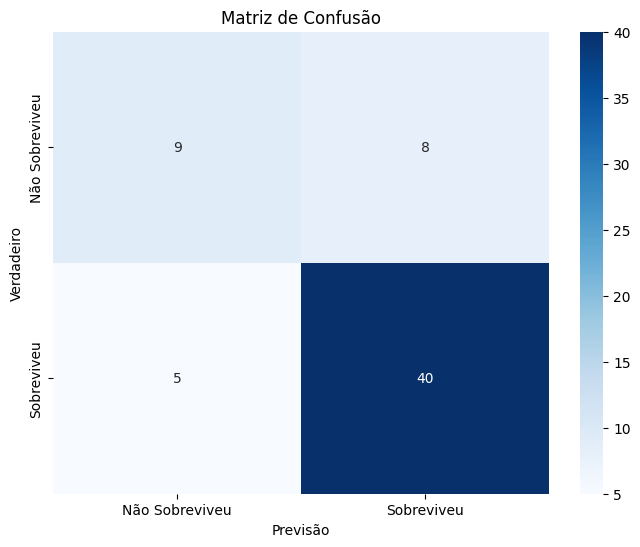

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

def carregar_dados():
    train_df = pd.read_csv("./resources/train.csv")
    test_df = pd.read_csv("./resources/test.csv")
    gender_submission_df = pd.read_csv("./resources/gender_submission.csv")
    return train_df, test_df, gender_submission_df

def exibir_dados(csv_data):
    print("Intervalo de linhas do train.csv")
    print("\n")
    print(csv_data.head())
    print("\n")

    print("\nInformações do train.csv")
    print("\n")
    print(csv_data.info())
    print("\n")

    print("\nEstatísticas descritivas do train.csv")
    print("\n")
    print(csv_data.describe())
    print("\n")

def tratar_valores_ausentes(train_df):
    mediana_age = train_df['Age'].median()
    train_df['Age'].fillna(mediana_age, inplace=True)

    moda_embarked = train_df['Embarked'].mode()[0]
    train_df['Embarked'].fillna(moda_embarked, inplace=True)

    train_df.dropna(subset=['Cabin'], inplace=True)

def selecionar_variaveis(train_df):
    colunas_interesse = ['Pclass', 'Sex', 'Age', 'Fare', 'Survived']
    dados_selecionados = train_df[colunas_interesse]
    dados_selecionados = pd.get_dummies(dados_selecionados, columns=['Sex'], drop_first=True)
    return dados_selecionados

def dividir_dados(dados_selecionados):
    X = dados_selecionados.drop('Survived', axis=1)
    y = dados_selecionados['Survived']
    return X, y

def treinar_modelo(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    return knn

def avaliar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\n")
    print("\n")
    print(f"Acurácia do modelo: {accuracy:.2f}")
    print("\n")
    print("Relatório de classificação:")
    print("\n")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm = confusion_matrix(y_test, y_pred)
    print("\n")
    print("Matriz de Confusão:")
    print(cm)
    print("\n")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel('Previsão')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

train_df, test_df, gender_submission_df = carregar_dados()

exibir_dados(train_df)

tratar_valores_ausentes(train_df)

dados_selecionados = selecionar_variaveis(train_df)

print("\n")
print("\nDados após seleção de variáveis e conversão de categorias:")
print("\n")
print(dados_selecionados.head())

X, y = dividir_dados(dados_selecionados)

model = treinar_modelo(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
avaliar_modelo(model, X_test, y_test)
